In [1]:
from dataset import get_fashion_mnist_dataloader, get_imagenet_dataset, get_imagenet_dataloader, collate_classification, collate_pretraining
import numpy as np
import matplotlib.pyplot as plt
import torch

import torchvision
import torchvision.transforms.functional as F
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path


In [2]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [3]:
patch_size = 14
dataloader = get_imagenet_dataloader(pretraining=False, split="train", batch_size=8)

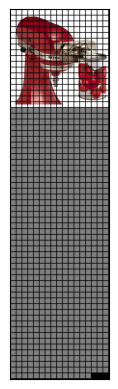

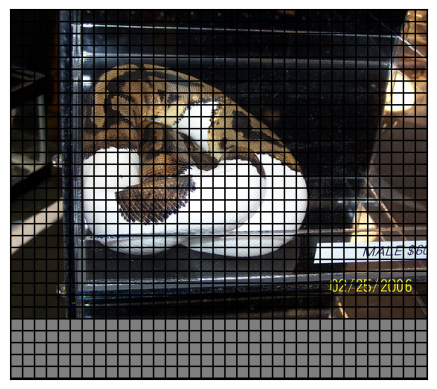

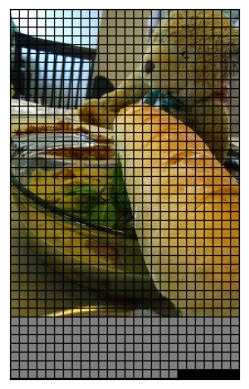

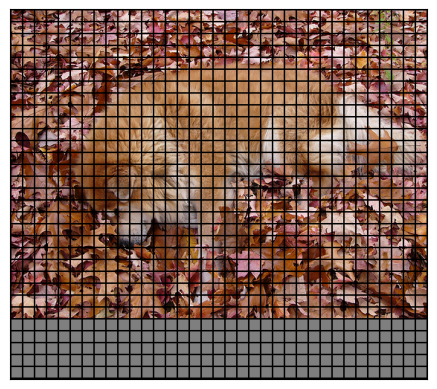

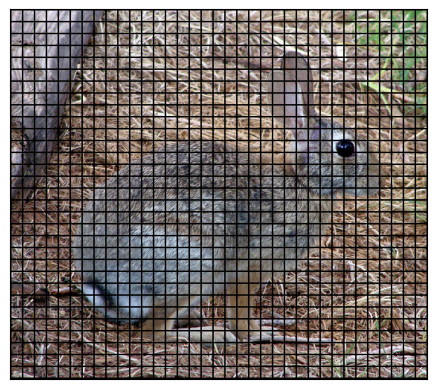

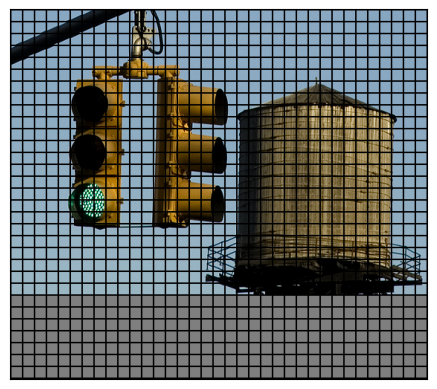

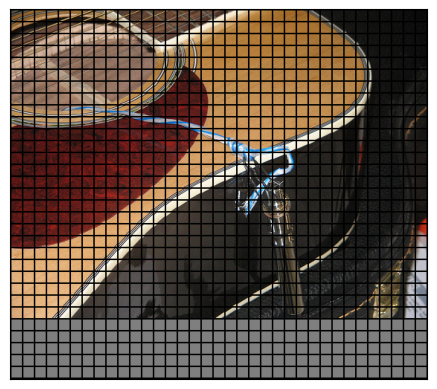

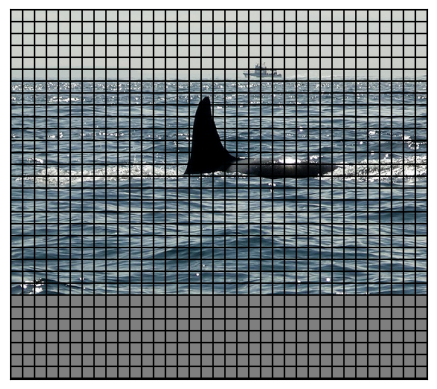

In [4]:
patched_images, labels, resolutions = next(iter(dataloader))
for idx, patched_image in enumerate(patched_images):
    patched_tensor = torch.from_numpy(np.moveaxis(patched_image.reshape(-1, patch_size, patch_size, 3), -1, 1) * 0.5 + 0.5)
    grid = make_grid(patched_tensor, resolutions[idx][1] // patch_size)
    show(grid)